In [5]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import MyData as data

In [3]:
view='xz'

In [6]:
data=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed/')
if view=='xz':
    fname='/pi-_10GeV_4ly_1e-4_inclined_viewx'
else:
    fname='/pi-_10GeV_4ly_1e-4_inclined_viewy'
data_trk=data.get_more_file(800,804,fname)


taking a list of file from  800  to  804


In [7]:
ly_vec=[]
x_vec=[]
z_vec=[]
y_vec=[]
dx_vec=[]
dy_vec=[]
for i in range(0,len(data_trk)):
    if view=='xz':
        ly_vec.append(data_trk[i].x[:,2].tolist())
        x_vec.append(data_trk[i].x[:,0].tolist())
        z_vec.append(data_trk[i].x[:,3].tolist())
        dx_vec.append(data_trk[i].x[:,1].tolist())
    else:
        ly_vec.append(data_trk[i].x[:,2].tolist())
        y_vec.append(data_trk[i].x[:,0].tolist())
        z_vec.append(data_trk[i].x[:,3].tolist())
        dy_vec.append(data_trk[i].x[:,1].tolist())



In [8]:
def lin_calc(xpos_x_comb,xpos_error_x_comb,zpos_x_comb):
    tmpden=xpos_error_x_comb*xpos_error_x_comb
    xsum_x_comb = ak.sum((xpos_x_comb)/(tmpden), axis=-1)
    zsum_x_comb = ak.sum((zpos_x_comb)/(tmpden), axis=-1)
    xzsum_x_comb = ak.sum((xpos_x_comb*zpos_x_comb)/(tmpden), axis=-1)
    zzsum_x_comb = ak.sum((zpos_x_comb*zpos_x_comb)/(tmpden), axis=-1)
    sum_n_x_comb = ak.sum(1./(tmpden), axis=-1)
    det_x_comb = zzsum_x_comb * sum_n_x_comb - zsum_x_comb * zsum_x_comb 
    a_x_comb = (xzsum_x_comb * sum_n_x_comb - xsum_x_comb * zsum_x_comb)/det_x_comb
    b_x_comb = (xsum_x_comb * zzsum_x_comb - xzsum_x_comb * zsum_x_comb)/det_x_comb
    chi2_x_comb = ak.sum((xpos_x_comb - a_x_comb * zpos_x_comb - b_x_comb)*(xpos_x_comb - a_x_comb * zpos_x_comb - b_x_comb)/(xpos_error_x_comb*xpos_error_x_comb), axis=-1)
    return a_x_comb,b_x_comb,chi2_x_comb

In [9]:
%%time
import itertools
import awkward as ak

if view=='xz':
    ax_vec=[]
    bx_vec=[]
    chi2x_vec=[]
    for ievent in range(0,len(data_trk)):
        a_x = -999
        b_x = -999
        chi2_x = pow(10, 9)

        nclu_x = len(ly_vec[ievent])

        xpos_x = x_vec[ievent]
        xpos_error_x = dx_vec[ievent]
        zpos_x = z_vec[ievent]
        planeIDs = ly_vec[ievent]
        #Find good combinations of x clusters and computer, for each of them, the track and its chi2     
        plane_set = set(planeIDs)
        n_fired_p = len(plane_set)
        cluID_combs_x = list(itertools.combinations(range(nclu_x), n_fired_p))
        for cluID_comb_x in cluID_combs_x:
            ps_comb = [planeIDs[i] for i in cluID_comb_x]
            # Check if the combination is a good one
            if len(ps_comb) == len(set(ps_comb)): 
                xpos_x_comb = ak.Array([xpos_x[i] for i in cluID_comb_x])
                xpos_error_x_comb = ak.Array([xpos_error_x[i] for i in cluID_comb_x])
                zpos_x_comb = ak.Array([zpos_x[i] for i in cluID_comb_x])
                a_x_comb,b_x_comb,chi2_x_comb=lin_calc(xpos_x_comb,xpos_error_x_comb,zpos_x_comb)
                # if ievent==16:
                #     print('x ',xpos_x_comb)
                #     print(' z ',zpos_x_comb )
                #     print('dx ',xpos_error_x_comb )
                if chi2_x_comb < chi2_x:
                    a_x = a_x_comb
                    b_x = b_x_comb
                    chi2_x = chi2_x_comb
        # if ievent==16:
        #     print(chi2_x)
            
        ax_vec.append(a_x)
        bx_vec.append(b_x)
        chi2x_vec.append(chi2_x)
        # print(chi2_x)
        # print(a_x)
        # print(b_x)
        
else:
    print('yz view')
    ay_vec=[]
    by_vec=[]
    chi2y_vec=[]
    for ievent in range(500,1000):#len(data_trk)):
        a_y = -999
        b_y = -999
        chi2_y = pow(10, 9)

        nclu_y = len(ly_vec[ievent])

        ypos_y = y_vec[ievent]
        ypos_error_y = dy_vec[ievent]
        zpos_y = z_vec[ievent]
        planeIDs = ly_vec[ievent]
        #Find good combinations of x clusters and computer, for each of them, the track and its chi2     
        plane_set = set(planeIDs)
        n_fired_p = len(plane_set)
        cluID_combs_y = list(itertools.combinations(range(nclu_y), n_fired_p))
        for cluID_comb_y in cluID_combs_y:
            ps_comb = [planeIDs[i] for i in cluID_comb_y]
            # Check if the combination is a good one
            if len(ps_comb) == len(set(ps_comb)): 
                ypos_y_comb = ak.Array([ypos_y[i] for i in cluID_comb_y])
                ypos_error_y_comb = ak.Array([ypos_error_y[i] for i in cluID_comb_y])
                zpos_y_comb = ak.Array([zpos_y[i] for i in cluID_comb_y])
                # print('event ',ievent)
                a_y_comb,b_y_comb,chi2_y_comb=lin_calc(ypos_y_comb,ypos_error_y_comb,zpos_y_comb)
                if chi2_y_comb < chi2_y:
                    a_y = a_y_comb
                    b_y = b_y_comb
                    chi2_y = chi2_y_comb
        ay_vec.append(a_y)
        by_vec.append(b_y)
        chi2y_vec.append(chi2_y)
        # print(chi2_x)
        # print(a_x)
        # print(b_x)


x  [-1.07, -10.1, -0.788, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 1.91, 0.09, 0.52]
x  [-1.07, -10.1, 11, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 1.91, 1.74, 0.52]
x  [-1.07, -2.34, -0.788, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 0.42, 0.09, 0.52]
x  [-1.07, -2.34, 11, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 0.42, 1.74, 0.52]
x  [-1.07, -0.442, -0.788, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 0.07, 0.09, 0.52]
x  [-1.07, -0.442, 11, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.21, 0.07, 1.74, 0.52]
x  [6, -10.1, -0.788, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.73, 1.91, 0.09, 0.52]
x  [6, -10.1, 11, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.73, 1.91, 1.74, 0.52]
x  [6, -2.34, -0.788, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.73, 0.42, 0.09, 0.52]
x  [6, -2.34, 11, -4.21]
 z  [-30.5, 1.16e+03, 1.2e+03, 1.79e+03]
dx  [0.73, 0.42, 1.74, 0.52]
x  [

IOStream.flush timed out
IOStream.flush timed out


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hax (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cax
Warning in <TROOT::Append>: Replacing existing TH1: hax (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cbx


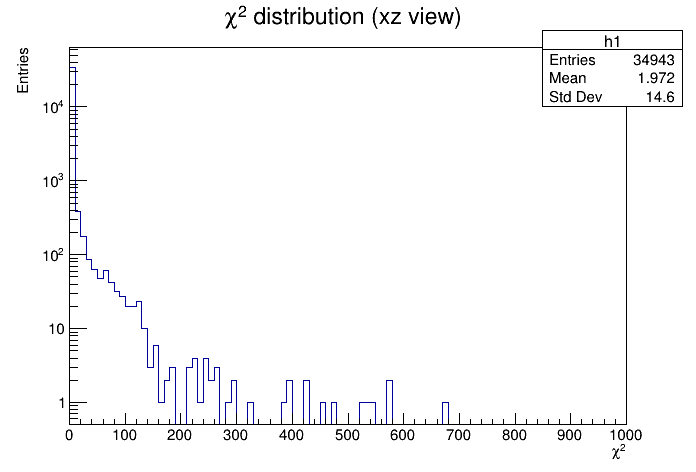

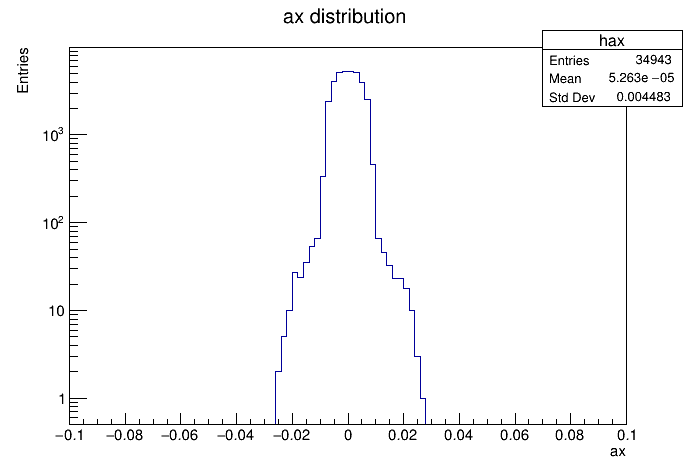

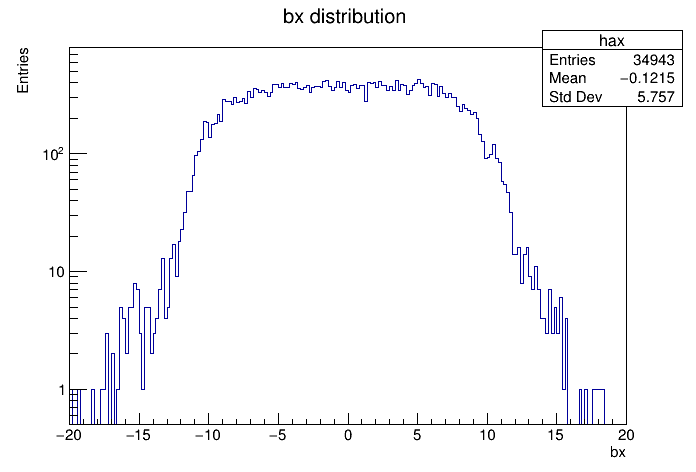

In [12]:
if view=='xz':
    h1=ROOT.TH1F("h1","h1",100,0,1000)
    h1.GetXaxis().SetTitle('#chi^{2}')
    h1.GetYaxis().SetTitle('Entries')
    h1.SetTitle('#chi^{2} distribution (xz view)')
    for i in range(0,len(chi2x_vec)):      
        h1.Fill(chi2x_vec[i])    
    c1=ROOT.TCanvas("c1","c1")
    c1.cd()
    h1.Draw()
    c1.SetLogy()
    c1.Draw()
    # c1.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/chixz.png')
    
    hax=ROOT.TH1F("hax","hax",100,-0.1,0.1)
    hax.GetXaxis().SetTitle('ax')
    hax.GetYaxis().SetTitle('Entries')
    hax.SetTitle('ax distribution')
    for i in range(0,len(ax_vec)):      
        hax.Fill(ax_vec[i])    
    cax=ROOT.TCanvas("cax","cax")
    cax.cd()
    hax.Draw()
    cax.SetLogy()
    cax.Draw()   
    # cax.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/cax.png')
    
    
    hbx=ROOT.TH1F("hax","hax",200,-20,20)
    hbx.GetXaxis().SetTitle('bx')
    hbx.GetYaxis().SetTitle('Entries')
    hbx.SetTitle('bx distribution')
    for i in range(0,len(bx_vec)):      
        hbx.Fill(bx_vec[i])    
    cbx=ROOT.TCanvas("cbx","cbx")
    cbx.cd()
    hbx.Draw()
    cbx.SetLogy()
    cbx.Draw()  
    # cbx.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/cbx.png')
    
else:
    h1=ROOT.TH1F("h1","h1",100,0,1000)
    h1.GetXaxis().SetTitle('#chi^{2}')
    h1.GetYaxis().SetTitle('Entries')
    h1.SetTitle('#chi^{2} distribution (yz view)')
    for i in range(0,len(chi2y_vec)):      
        h1.Fill(chi2y_vec[i])    
    c1=ROOT.TCanvas("c1","c1")
    c1.cd()
    h1.Draw()
    c1.SetLogy()
    c1.Draw()
    # c1.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/chiyz.png')
    
    hay=ROOT.TH1F("hay","hay",100,-0.1,0.1)
    hay.GetXaxis().SetTitle('ay')
    hay.GetYaxis().SetTitle('Entries')
    hay.SetTitle('ay distribution')
    for i in range(0,len(ay_vec)):      
        hay.Fill(ay_vec[i])    
    cay=ROOT.TCanvas("cay","cay")
    cay.cd()
    hay.Draw()
    cay.SetLogy()
    cay.Draw()   
    # cay.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/cay.png')
    
    
    hby=ROOT.TH1F("hby","hby",100,-20,20)
    hby.GetXaxis().SetTitle('by')
    hby.GetYaxis().SetTitle('Entries')
    hby.SetTitle('by distribution')
    for i in range(0,len(by_vec)):      
        hby.Fill(by_vec[i])    
    cby=ROOT.TCanvas("cby","cby")
    cby.cd()
    hby.Draw()
    cby.SetLogy()
    cby.Draw()  
    # cby.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/cby.png')

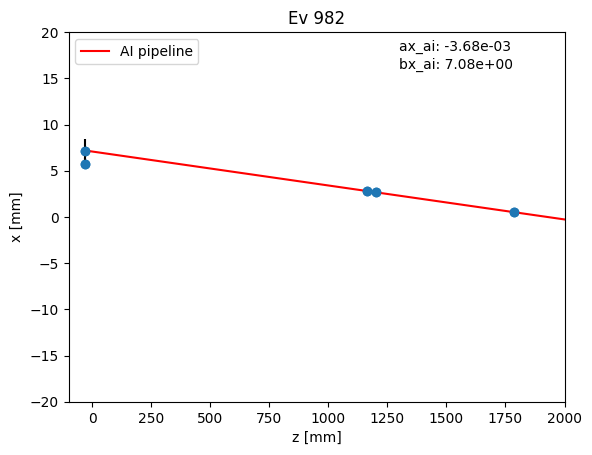

In [11]:
if view=='xz':

    x = np.linspace(-35, 2000, 4)
    
    for i in range(982,983): # 
        plt.scatter(z_vec[i],x_vec[i]) 
        y=ax_vec[i]*x+bx_vec[i] 
        plt.plot(x, y, color='red',label='AI pipeline') 
        plt.ylim(-20,20) 
        ax_rounded = '{:.2e}'.format(ax_vec[i])
        bx_rounded = '{:.2e}'.format(bx_vec[i])
        plt.ylabel('x [mm]') 
        plt.xlabel('z [mm]') 
        plt.text( 1300,18,f'ax_ai: {ax_rounded}', fontsize=10)
        plt.text(1300, 16, f'bx_ai: {bx_rounded}', fontsize=10) 
        plt.legend(loc='upper left')
        plt.xlim(-100,2000) 
        plt.title(f'Ev {i}') 
        # print(dx_vec[i]) 
        # print(x_vec[i]) 
        plt.errorbar(z_vec[i], x_vec[i], xerr=0,yerr=dx_vec[i],fmt='o',ecolor='black')
        # plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/Sim_tradpip_ev_xz{i}.png')      
        plt.show()
else:
    x = np.linspace(-35, 2000, 4)
    for i in range(0,5): # 
        plt.scatter(z_vec[i],y_vec[i]) 
        y=ay_vec[i]*x+by_vec[i] 
        plt.plot(x, y, color='red') 
        plt.ylim(-20,20) 
        ay_rounded = '{:.2e}'.format(ay_vec[i])
        by_rounded = '{:.2e}'.format(by_vec[i])
        plt.ylabel('y [mm]') 
        plt.xlabel('z [mm]') 
        plt.text( 1500,18,f'ay: {ay_rounded}', fontsize=10)
        plt.text(1500, 16, f'by: {by_rounded}', fontsize=10) 

        plt.xlim(-100,2000) 
        plt.title(f'Ev {i}') 
        # print(dy_vec[i]) 
        # print(y_vec[i]) 
        plt.errorbar(z_vec[i], y_vec[i], xerr=0,yerr=dy_vec[i],fmt='o',ecolor='black')
        
        # plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/simdata_trad_pip/Sim_tradpip_ev_yz{i}.png')      
        plt.show()